### Data Analysis
- 원시(원본 그대로) 데이터를 분석하여 인사이트(가시성 증가 및 깊은 이해)로 변환하는 작업이다.
- 문제를 해결하기 위해 데이터를 사용해서 흐름 및 방향을 찾는 기술이다.
- 데이터 분석을 통해 비즈니스 프로세스를 구성하고, 의사 결정을 개선하며, 비즈니스 성장을 증진할 수 있다.

<img src="./images/architecture.png" width="900px" style="margin-left: 10px;">
** <sub>ETL은 Extract(추출), Transform(변환), Load(적재)를 의미한다. 여기 저기 흩어진 데이터를 하나로 모으기 위한 결합 과정이다.</sub>


### 기초 통계 (Basic statistics)
📌 통계는 아직 발생하지 않은 일을 예측하기 위해 사용한다.
- 통계학을 공부하는 데 있어 필요한 기본 개념이고,
  수량적인 비교를 기초로 많은 사실을 관찰하고 처리하는 방법을 연구하는 학문이다.
- 불균형 데이터를 대상으로 규칙성과 불규칙성을 발견한 뒤 실생활에 적용할 수 있다.

<img src="./images/statistics01.png" style="margin-top: 20px">

#### 변량 (Variable)
- 자료의 수치를 변량이라고 하며, 이는 데이터의 값을 의미한다.

In [10]:
# 지역 별 총 100명의 키
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(151, 190, size=(10, 10)),
                              columns="서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원".split(","))
display(df)

,서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원
0,167,187,160,172,156,170,166,181,159,158
1,173,181,166,189,187,155,175,180,156,168
2,163,164,161,184,181,180,157,189,161,173
3,154,182,172,162,183,168,156,167,163,187
4,168,161,159,168,157,172,185,166,156,182
5,178,155,163,182,159,161,166,189,163,170
6,185,156,163,162,173,163,179,153,172,186
7,188,188,181,163,151,180,184,156,182,156
8,151,165,184,170,187,180,181,167,188,154
9,177,169,182,170,166,154,161,160,168,176


In [13]:
%%timeit -n 100 -r 10
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(151, 190, size=(10, 10)),
                              columns="서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원".split(","))

54.7 µs ± 6.19 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [11]:
# %%timeit -n 100 -r 10
# import pandas as pd
# import random

# df = pd.DataFrame([[random.randrange(151, 190) for _ in range(10)] for _ in range(10)],
#                               columns="서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원".split(","))

169 µs ± 10.7 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


#### 계급 (Class)
- 변량을 일정 간격으로 나눈 구간을 의미한다.
- 변량의 최솟값과 최댓값을 잘 고려해서 계급을 정해야 한다.
- 예를 들어, 150~160 계급이 있을 경우, 160까지 속한다. 즉, 151 ~ 160까지이다.

In [15]:
df_seoul = df['서울']
df_class = pd.cut(df_seoul, bins=[150, 160, 170, 180, 190])
df_seoul_class = pd.DataFrame({'서울': df_seoul, '계급': df_class})
df_seoul_class

,서울,계급
0,167,"(160, 170]"
1,173,"(170, 180]"
2,163,"(160, 170]"
3,154,"(150, 160]"
4,168,"(160, 170]"
5,178,"(170, 180]"
6,185,"(180, 190]"
7,188,"(180, 190]"
8,151,"(150, 160]"
9,177,"(170, 180]"


#### 도수 (Frequency)
- 각 계급에 속하는 변량의 개수를 의미한다.

In [17]:
df_seoul_class.groupby('계급', observed=True).count()

,서울
계급,
"(150, 160]",2
"(160, 170]",3
"(170, 180]",3
"(180, 190]",2


#### 상대 도수 (Relative frequency)
- 각 계급에 속하는 변량의 비율을 의미한다.

In [19]:
df_seoul_class.groupby('계급', observed=False).count().apply(lambda x: x / 100)

,서울
계급,
"(150, 160]",0.02
"(160, 170]",0.03
"(170, 180]",0.03
"(180, 190]",0.02


#### 도수분포표 (Frequency table)
- 주어진 자료를 계급별로 나눈 뒤 각 계급에 속하는 도수 및 상대 도수를 조사한 표이다.
- 구간별 분포를 한 번에 알아보기 좋지만 계급별 각 변량의 정확한 값이 생략되어 있다.

In [21]:
freq_df = pd.DataFrame({"도수": df_seoul_class.groupby('계급', observed=False).count()["서울"],
             "상대 도수": df_seoul_class.groupby('계급', observed=False).count().apply(lambda x: x / 100)["서울"]})
display(freq_df)

,도수,상대 도수
계급,,
"(150, 160]",2,0.02
"(160, 170]",3,0.03
"(170, 180]",3,0.03
"(180, 190]",2,0.02


In [22]:
freq_df.reset_index(drop=False)

,계급,도수,상대 도수
0,"(150, 160]",2,0.02
1,"(160, 170]",3,0.03
2,"(170, 180]",3,0.03
3,"(180, 190]",2,0.02


#### 히스토그램 (Histogram)
- 도수분포표를 시각화한 그래프이다.

<Axes: >

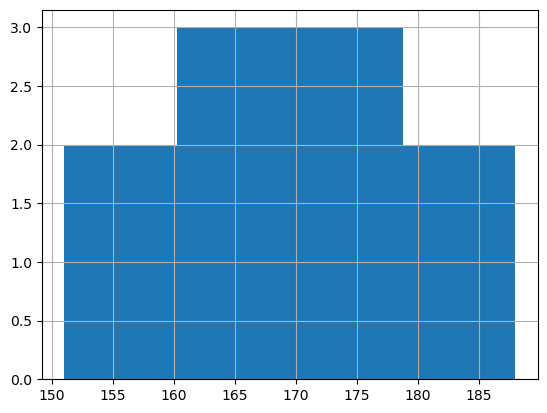

In [24]:
import matplotlib.pyplot as plt
import numpy as np

df_seoul_class["서울"].hist(bins=4)

#### 산술 평균 (Mean)
- 변량의 합을 변량의 수로 나눈 값을 의미한다.

<img src="./images/mean.png" style="margin-left: 20px">


In [25]:
df.mean(axis=0).to_frame(name='평균 키')

,평균 키
서울,170.4
경기,170.8
인천,169.1
광주,172.2
대구,170.0
부산,168.3
전주,171.0
강릉,170.8
울산,166.8
수원,171.0


#### 편차 (Deviation)
- 변량에서 평균을 뺀 값이다.
- 각 변량의 편차를 구한 뒤 모두 합하면 0이 되기 때문에 편차의 평균을 구할 수 없다.

In [32]:
gyeonggi_df = df["경기"].to_frame()
gyeonggi_df["편차"] = gyeonggi_df["경기"].apply(lambda x: x - gyeonggi_df.mean())

display(gyeonggi_df)

# e가 붙어있는 수는 엄청 작은 수나 엄청 큰 수를 간략화 해주는 기능
# 이 때 e는 자연 상수가 아니며, 과학적 기수법 e라고 표현한다.
# (a)e(b) = a * 10^b

print(gyeonggi_df['편차'].sum())

# 실수의 오류를 원래 값으로 변경하고자 반올림(round()) 사용
total = round(gyeonggi_df['편차'].sum())
print(f'편차의 합: {total}')

,경기,편차
0,187,16.2
1,181,10.2
2,164,-6.8
3,182,11.2
4,161,-9.8
5,155,-15.8
6,156,-14.8
7,188,17.2
8,165,-5.8
9,169,-1.8


-1.1368683772161603e-13
편차의 합: 0


In [33]:
df.describe()

,서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,170.400000,170.800000,169.100000,172.200000,170.000000,168.300000,171.000000,170.800000,166.800000,171.000000
std,12.240189,12.629771,9.848294,9.647107,13.904436,9.944848,11.135529,13.147032,10.881176,12.128937
min,151.000000,155.000000,159.000000,162.000000,151.000000,154.000000,156.000000,153.000000,156.000000,154.000000
25%,164.000000,161.750000,161.500000,164.250000,157.500000,161.500000,162.250000,161.500000,159.500000,160.500000
50%,170.500000,167.000000,164.500000,170.000000,169.500000,169.000000,170.500000,167.000000,163.000000,171.500000
75%,177.750000,181.750000,178.750000,179.500000,182.500000,178.000000,180.500000,180.750000,171.000000,180.500000
max,188.000000,188.000000,184.000000,189.000000,187.000000,180.000000,185.000000,189.000000,188.000000,187.000000


#### 분산 (Variance)
- 변량이 평균으로부터 떨어져 있는 정도를 보기 위한 통계량이다.
- 편차를 각각 제곱하여 그 합을 구한 뒤 산술 평균을 낸다.

<img src="./images/variance.png" style="margin-left: 10px">

In [37]:
gyeonggi_df["편차의 제곱(분산)"] = gyeonggi_df["편차"].apply(lambda x: x**2)

display(gyeonggi_df)

variance = gyeonggi_df["편차의 제곱(분산)"].mean()
print(f"분산: {round(variance, 2)}")

,경기,편차,편차의 제곱(분산)
0,187,16.2,262.44
1,181,10.2,104.04
2,164,-6.8,46.24
3,182,11.2,125.44
4,161,-9.8,96.04
5,155,-15.8,249.64
6,156,-14.8,219.04
7,188,17.2,295.84
8,165,-5.8,33.64
9,169,-1.8,3.24


분산: 143.56


#### 표준편차 (Standard deviation)
- 분산의 제곱근이며, 관측된 변량이 흩어져 있는 정도를 하나의 수치로 나타내는 통계량이다.
- 표준편차가 작을 수록 평균값에서 변량들의 거리가 가깝다고 판단한다.

<img src="./images/standard_deviation.png" style="margin-left: 15px">

In [38]:
import math

std = math.sqrt(variance)
print(f'표준편차: {std}')

표준편차: 11.981652640600128


#### 확률변수 (Random variable)
- 머신러닝, 딥러닝 등 확률을 다루는 분야에 있어서 필수적인 개념이다.
- 확률(probability)이 있다는 뜻은 사건(event)이 있다는 뜻이며,  
  시행(trial)을 해야 시행의 결과인 사건(event)이 나타난다.
- 시행(trial)을 해서 어떤 사건(event)이 나타났는지에 따라 값이 정해지는 변수이다.
- 알파벳 대문자로 표현하며, X, Y, Z 또는 X<sub>1</sub>, X<sub>2</sub>, X<sub>3</sub>과 같이 표현한다.
- 확률 변수는 집합이며, 원소를 확률변수값(Value of random variable)이라고 표현한다.  
  확률변수에서 사용한 알파벳의 소문자를 사용한다.
- Y = { y<sub>1</sub>, y<sub>2</sub>, y<sub>3</sub> }, 이 때 Y는 확률변수이고 원소인 y<sub>1</sub> ~ y<sub>3</sub>은 확률변수값이다.

<img src="./images/random_variable.jpg" width="700px" style="margin-left: 15px">

#### 범주형 확률변수 (Categorical random variable)
- 범주형 확률변수값은 수치가 아닌 기호나 언어, 숫자 등으로 표현하고, 기호나 언어는 순서를 가질 수도 있다.
- 유한집합으로 표현한다. 유한집합은 원소의 수가 유한한 집합을 의미한다.
- {앞면, 뒷면}, {동의, 미동의}, {선택, 미선택}, {봄, 여름, 가을, 겨울}

#### 이산형 확률변수 (Discrete random variable)
- 이산형 확률변수값은 수치로 표현하고 셀 수 있는 값이다. 이를 더 넓은 범위로, 양적 확률변수 또는 수치형 확률변수라고도 부른다.
- 유한집합 또는 셀 수 있는 무한집합으로 표현한다. 무한집합은 원소의 수가 무한한 집합을 의미한다.
- {0, 1, 2, 3}, {10, 20, 30}, {1, 2, 3, ...}, {100, 1000, 10000}

#### 연속형 확률변수 (Continuous random variable)
- 연속형 확률변수는 구간을 나타내는 수치로 표현한다. 이를 더 넓은 범위로, 양적 확률변수 또는 수치형 확률변수라고도 부른다.
- 셀 수 없는 무한집합으로 표현한다.
- 128.56 < X < 268.56

#### 확률분포 (Probability distribution)
- 사건에 대한 확률변수에서 정의된 모든 확률값의 분포이며, 서로 다른 모든 결과의 출현 확률을 제공한다.

> <strong>1) 동전 던지기 (시행)</strong>  
> <strong>2) { 0, 1 } (확률변수와 확률변수값)</strong>  
> <strong>3) 완벽한 형태의 동전일 경우 확률 분포</strong>  
>
> <img src="./images/probability_distribution01.png">  



> <strong>1) 1 ~ 12까지 새겨진 주사위 던지기 (시행)</strong>  
> <strong>2) { 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 } (확률변수와 확률변수값)</strong>  
> <strong>3) 완벽한 형태의 주사위일 경우 확률 분포</strong>
>
> <img src="./images/probability_distribution02.png">


#### 확률분포표 (Probability distribution table)
- 확률변수의 모든 값(원소)에 대해 확률을 표로 표시한 것이다.
- 범주형 또는 이산형 확률변수의 확률분포를 표현하기에 적합한 방식이다.

In [42]:
import numpy as np
import pandas as pd

df_h_dist = pd.DataFrame(np.arange(0, 100) % 4 + 1, columns=['경주마 번호'])

df_h_dist_group = df_h_dist.groupby('경주마 번호')['경주마 번호'].count().reset_index(name='1등 횟수')

df_h_dist_group['1등할 확률'] = df_h_dist_group['1등 횟수'] / 100
display(df_h_dist_group)

,경주마 번호,1등 횟수,1등할 확률
0,1,25,0.25
1,2,25,0.25
2,3,25,0.25
3,4,25,0.25


#### 확률분포함수 (Probability distribution function)
- 확률변수의 분포를 나타내는 함수로서, 확률변수의 확률변수값이 나올 확률을 나타내는 함수이다.
- 확률질량함수, 확률밀도함수 등의 함수가 있다.

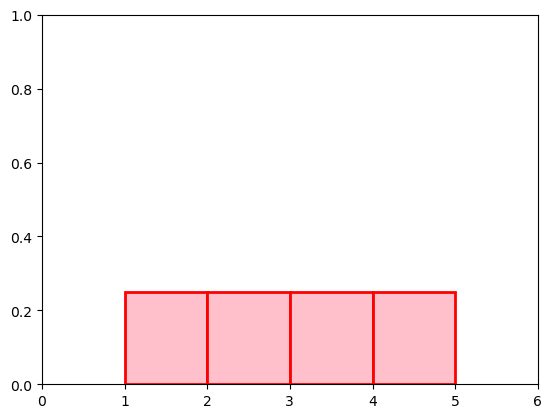

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_h_dist['경주마 번호'], range(1, 6), density=True, color='pink', edgecolor='red', linewidth=2)
plt.xlim(0, 6)
plt.ylim(0, 1)
plt.show()

#### 확률질량 함수 (Probability mass function, pmf)
- 확률변수 X의 분포를 나타내는 함수로서, x<sub>i</sub>가 나올 확률이다.
- 확률변수의 값을 매개변수로 전달(입력)받고, 해당 값이 나타날 확률을 구해서 리턴(출력)하는 함수이다.
- 범주형 확률변수와 이산형 확률변수에서 사용된다.
- 확률변수에서 각 값에 대한 확률을 나타내는 것이 마치 각 값이 "질량"을 가지고 있는 것처럼 보이기 때문에 확률질량 함수로 불린다.

> 확률질량 함수 f는 확률변수 X가 x를 변수값으로 가질 때의 확률이다.  
> <img src="./images/pmf01.png" style="margin-top: 10px">   
> <img src="./images/pmf02.png">  
> <img src="./images/pmf03.png">  

In [52]:
import numpy as np
import pandas as pd

df_h = pd.DataFrame(np.random.randint(1, 5, size=(100, 1)), columns=['경주마 번호'])

df_h_group = df_h.groupby('경주마 번호')['경주마 번호'].count().reset_index(name="1등 횟수")

df_h_group['1등할 확률'] = df_h_group['1등 횟수'] / 100

display(df_h_group)


,경주마 번호,1등 횟수,1등할 확률
0,1,20,0.20
1,2,20,0.20
2,3,29,0.29
3,4,31,0.31


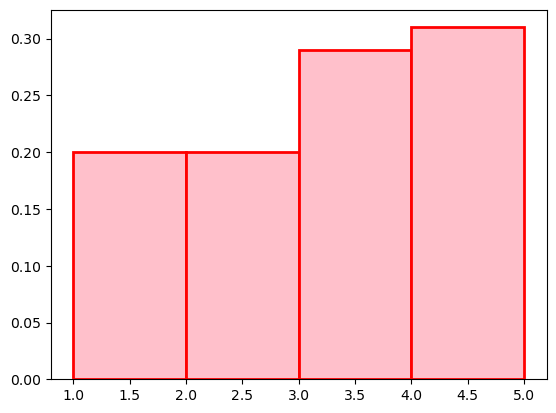

In [53]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_h['경주마 번호'], range(1, 6), density=True, color='pink', edgecolor='red', linewidth=2)
plt.show()

#### 무한대 (Infinity)
- 끝없이 커지는 상태를 의미하고 기호로 ∞를 사용한다.

#### 무한소 0 (Infinitesimal)
- 거의 없다는 의미이고, 0에 매우 근접하지만 0이 아닌 상태를 의미한다.

#### 미분 (Differential)
- 기울기는 독립변수가 종속변수에 미치는 영향력의 크기를 의미한다.
- 변경 전의 독립변수 x<sub>1</sub>이라는 점과 변경 후의 x<sub>2</sub>라는 점을 지나는 직선의 기울기가 바로 변화에 대한 속도이다.
- 즉, 직선의 기울기가 4로 구해졌다면, 종속변수가 독립변수의 변화에 4배 속도로 변화된 것이다.
- 이 때, 두 점 사이가 무한히 가까워지면, 결국 거의 한 점과 같은 점에 대한 접선의 기울기가 되고 이는 순간적인 변화량이다.
- 미분을 통해서 독립변수가 미세하게 변화할 때 순간적으로 종속변수가 얼마나 빠르게 변화하는지를 알 수 있다.

#### 적분 (Integral)
- 선분 = 높이 (길이), 면적 = 가로 X 높이
- 면적을 구할 때 여러 사각형으로 나눈 뒤 합하여도 전체 면적이 나온다.
- 가로가 무한소 0인 사각형, 즉 선분과 거의 비슷한 사각형을 쌓은 뒤, 각 면적을 모두 합하는 것이 적분이다.

#### 확률밀도 함수 (Probability density function, pdf)
- 확률변수 X의 분포를 나타내는 함수로서, 특정 구간에 속할 확률이고 이는 특정 구간을 적분한 값이다.
- 확률변수값의 범위(구간)를 매개변수로 전달받고, 범위의 넓이를 구해서 리턴하는 함수이다.
- 연속형 확률변수에서 사용된다.
- 전체에 대한 확률이 아닌 구간에 포함될 확률을 나타내기 때문에 구간에 따른 밀도를 구하는 것이고, 이를 통해 확률밀도 함수라 불린다.

> 확률밀도 함수 f는 특정 구간에 포함될 확률을 나타낸다.  
> <img src="./images/pdf01.png" style="margin-top: 10px">  
> <img src="./images/pdf02.png">    
> <img src="./images/pdf03.png">    
> <img src="./images/pdf04.png">     


구간 [-1, 2]에서의 확률: 0.8185946141203638


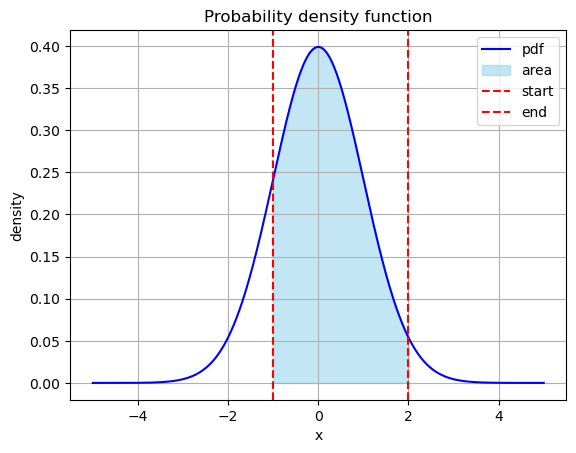

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 임의의 확률밀도 함수 정의
def pdf(x):
    # 정규분포
    mu = 0
    sigma = 1
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((x - mu) / sigma) ** 2 / 2)

# 랜덤한 구간
a = -1
b = 2

def calculate_probability_in_range(a, b):
    probability, _ = quad(pdf, a, b)
    return probability

probability = calculate_probability_in_range(a, b)
print(f'구간 [{a}, {b}]에서의 확률: {probability}')

x_values = np.linspace(-5, 5, 10000)
y_values = pdf(x_values)

plt.plot(x_values, y_values, label='pdf', color='blue')
plt.fill_between(x_values, y_values, where=(x_values >= a) & (x_values <= b), color='skyblue', alpha=0.5, label='area')
plt.axvline(x=a, linestyle='--', color='red', label='start')
plt.axvline(x=b, linestyle='--', color='red', label='end')
plt.xlabel('x')
plt.ylabel('density')
plt.title('Probability density function')
plt.legend()
plt.grid(True)
plt.show()

#### 정규분포 (Normal distribution)
- 모든 독립적인 확률변수들의 평균은 어떠한 분포에 가까워지는데, 이 분포를 정규분포라고 한다.
- 즉, 비정규분포의 대부분은 극한상태에 있어서 정규분포에 가까워진다.

<img src="./images/normal_distribution01.png" width="500px"> <img 
src="./images/normal_distribution02.png" width="500px">

- 평균 μ(mu)와 표준편차 σ(sigma)에 대해 아래의 확률밀도함수를 가지는 분포를 의미한다.
  
<div style="display: flex">
    <div>
        <img src="./images/normal_distribution03.png" width="230px" style="margin-left: 20px">
    </div>
    <div>
        <img src="./images/normal_distribution04.png" width="700px" style="margin-left: 20px">
    </div>
</div>

#### 표준 정규분포 (Standard normal distribution)
- 정규분포는 평균과 표준편차에 따라서 모양이 달라진다.

<img src="./images/standard_normal_distribution01.png" width="400px">

- 정규분포를 따르는 분포는 많지만 각각의 평균과 표준편차가 달라서 일반화할 수 없다.
- N(μ, σ) = N(0, 1)로 만든다면 모두 같은 특성을 가지는 동일한 확률분포로 바꿔서 일반화할 수 있다.
- 따라서 일반 정규분포를 표준 정규분포로 바꾼 뒤 표준 정규분포의 특정 구간의 넓이를 이용해서 원래 분포의 확률을 구할 수 있다.

<img src="./images/standard_normal_distribution02.png" width="550px">

#### 표준화 (Standardization)
- 다양한 형태의 정규분포를 표준 정규분포로 변환하는 방법이다.
- 표준 정규분포에 대한 값(넓이)를 이용해 원래 분포의 확률을 구할 수 있다.

<img src="./images/standardization01.png" style="margin-left: 20px">  
  
<img src="./images/standardization02.png" style="margin-left: 20px">  

#### 모집단과 모수 (Population and population parameter)
- 모집단이란, 정보를 얻고자 하는 대상의 전체 집합을 의미한다.
- 모수란, 모집단의 수치적 요약값을 의미한다. 평균 또는 표준편차와 같은 모집단의 통계값을 모수라고 한다.

#### 표본과 샘플링 (Sample and Sampling)
- 표본이란, 모집단의 부분집합으로서 표본의 통계량을 통해 모집단의 통계량을 추론할 수 있다.
- 모집단의 통계량을 구할 수 없는 상황 즉, 전수 조사가 불가능한 상황에서 임의의 표본을 추출하여 분석한다.
- 이렇게 표본(Sample)을 추출하는 작업을 샘플링(Sampling)이라고 한다.

### 데이터 분석의 범위
<img src="./images/statistics02.png" width="400px" style="margin-left: 10px;">  
  
#### 기술 통계 (Descriptive Statistics)
- 수집한 데이터의 요약을 통해서 데이터를 설명(묘사)하는 기법이다.
- 수집한 데이터의 전체적인 모양을 그리기 위해 기술 통계 기법을 사용한다.
- 집중화 경향(Central tendency): 평균(Mean), 중앙값(Median), 최빈값(Mode)
- 분산도(Variation): 표준편차(Standard deviation), 사분위(Quartile)

#### 추론 통계 (Inferential Statistics)
- 수집한 데이터를 기반으로 특성(패턴)을 알아낸 뒤 특정 데이터를 추론하거나 예측하는 기법이다.
- 모집단(Population)에서 일정 표본(Sample)을 채취한 뒤, 표본에 대한 통계를 구하여 모집단에 대해 추론한다. 이를 통해 결론에 도달하는 기법이다.
- 데이터 전체를 조사할 수 없을 때, 랜덤한 표본을 분석해서 나온 결과를 전체적으로 일반화시킬 때 유용하다.